In [199]:
from macros import *
from true_params import *
from mixtures.learn_mixture import *
from mixtures.mixture_checks import *
from mixtures.mixture_helpers import *

def array_printer(arr):
    for line in arr:
        print(str(line).replace("\n", ""))

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
np.set_printoptions(formatter={"float": lambda x: "{0:+0.3f}".format(x)})
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Preliminaries

In [4]:
s = max(lds.s for lds in LDS_LIST)
kappa = max(*[lds.kappa for lds in LDS_LIST],
            *[op_norm(lds.get_observability(2*s))/min_sv(lds.get_controllability(s)) for lds in LDS_LIST])

print(f"s={s}, kappa={kappa}")

s=2, kappa=1.414213562373095


### Checking Pi_M

In [230]:
lds_1_samples = generate_mixture_samples(LDS_LIST, [1, 0], s, 10000)

# Pi_M = get_Pi_M(samples, s)
# G_tilde = get_G_tilde(p, n, s, k, Pi_M)
# R = get_R(samples)
# approx_weights, markov_parameters = adjust_for_weights(G_tilde, R, s)

In [231]:
single_Pi_M = get_equal_weighted_Pi_M(lds_1_samples, s)

In [234]:
single_expected = get_indiv_Pi_M(LDS_LIST, s)[0]

<Axes: >

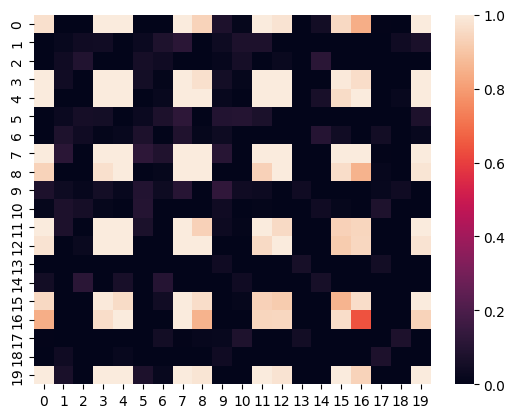

In [235]:
sns.heatmap(single_Pi_M, vmin=0, vmax=1)

<Axes: >

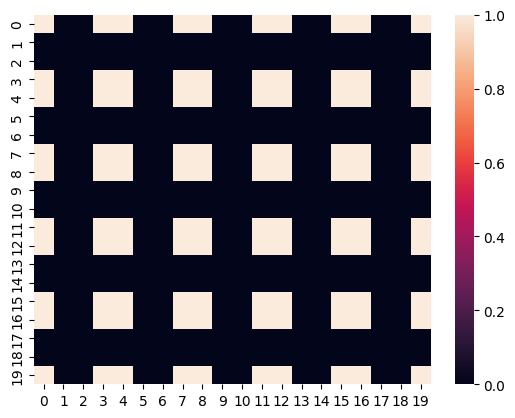

In [236]:
sns.heatmap(single_expected)

<Axes: >

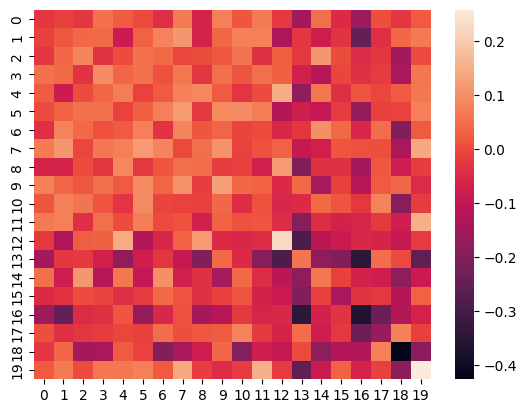

In [237]:
sns.heatmap(single_Pi_M - single_expected)

In [239]:
get_r2(single_Pi_M, single_expected)

0.9650951834180156

### Get Pi_M for Mixtures

In [256]:
weights_1 = [0.5, 0.5]
samples_1  = generate_mixture_samples(LDS_LIST, weights_1, s, 100000)


In [ ]:
weights_2 = [0.25, 0.75]
samples_2 = generate_mixture_samples(LDS_LIST, weights_2, s, 100000)

In [ ]:
Pi_M_1 = get_equal_weighted_Pi_M(samples_1, s)


In [ ]:
Pi_M_2 = get_equal_weighted_Pi_M(samples_2, s)

In [ ]:
expected_Pi_M_1 = get_expected_Pi_M(LDS_LIST, weights_1, s)
expected_Pi_M_2 = get_expected_Pi_M(LDS_LIST, weights_2, s)

In [ ]:
get_r2(Pi_M_1, expected_Pi_M_1), get_r2(Pi_M_2, expected_Pi_M_2)

(0.9274826491149012, 0.9246146043332468)

### Generalized Eigendecomposition to Find Markov Parameters

In [ ]:
expected_pre_components = extract_components(expected_Pi_M_1, expected_Pi_M_2, k)
expected_components = rescale_components(expected_pre_components, expected_Pi_M_1)
expected_components

c:\Users\nitin\Desktop\School\MEng\learning_lds\mixtures\learn_mixture.py:45: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  square_reweighting, _, _ , _ = la.lstsq(np.array([np.kron(vec, vec) for vec in components]).T, Pi_M.flatten())


array([[-0.707, -0.000, +0.000, -0.707, -0.707, +0.000, +0.000, -0.707,
        -0.707, -0.000, +0.000, -0.707, -0.707, +0.000, +0.000, -0.707,
        -0.707, -0.000, +0.000, -0.707],
       [+0.707, +0.000, +0.000, +0.707, +0.707, +0.000, +0.000, -0.000,
        -0.000, +0.707, +0.000, -0.000, +0.707, +0.000, +0.000, -0.000,
        -0.000, +0.707, +0.000, -0.000]])

In [ ]:
pre_components = extract_components(Pi_M_1, Pi_M_2, k)
components = rescale_components(pre_components, Pi_M_1)
components

array([[+0.694, -0.082, -0.089, +0.648, +0.700, -0.036, +0.029, -0.089,
        -0.025, +0.610, -0.073, -0.029, +0.665, +0.069, +0.036, -0.036,
        -0.075, +0.620, +0.065, -0.088],
       [+0.787, +0.038, +0.022, +0.744, +0.803, -0.071, +0.014, +0.717,
        +0.753, +0.070, +0.089, +0.567, +0.849, -0.025, +0.072, +0.609,
        +0.771, +0.016, +0.094, +0.663]])

### Get Weights

In [ ]:
R = get_R(samples_1, s)
R

array([+0.995, -0.016, +0.003, +0.971, +1.004, -0.011, +0.029, +0.499,
       +0.506, +0.503, +0.042, +0.483, +1.058, -0.016, +0.050, +0.453,
       +0.540, +0.490, +0.048, +0.455])

In [ ]:
expected_R = get_expected_R(LDS_LIST, weights_1, s)
expected_R

array([+1.000, +0.000, +0.000, +1.000, +1.000, +0.000, +0.000, +0.500,
       +0.500, +0.500, +0.000, +0.500, +1.000, +0.000, +0.000, +0.500,
       +0.500, +0.500, +0.000, +0.500])

In [ ]:
weights, components = get_weights_and_components(components, R)

c:\Users\nitin\Desktop\School\MEng\learning_lds\mixtures\learn_mixture.py:52: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sqrt_weights, _, _, _ = la.lstsq(components.T, R)


In [ ]:
weights

array([+0.416, +0.553])

In [ ]:
components

array([[+1.076, -0.127, -0.139, +1.004, +1.084, -0.056, +0.045, -0.138,
        -0.039, +0.945, -0.113, -0.044, +1.031, +0.107, +0.055, -0.057,
        -0.117, +0.961, +0.101, -0.136],
       [+1.058, +0.052, +0.030, +1.001, +1.080, -0.095, +0.019, +0.964,
        +1.012, +0.094, +0.120, +0.762, +1.141, -0.033, +0.097, +0.819,
        +1.037, +0.021, +0.126, +0.891]])

We are recovering the Markov components quite well! This is enough to call the algorithm a success.

### Parameter Recovery

In [ ]:
A, B, C, D = get_lds_parameters(components[0], m, n, p)

In [ ]:
markov_param_estimates = [D] + [C @ mpow(A, i) @ B for i in range(10)]

<Axes: >

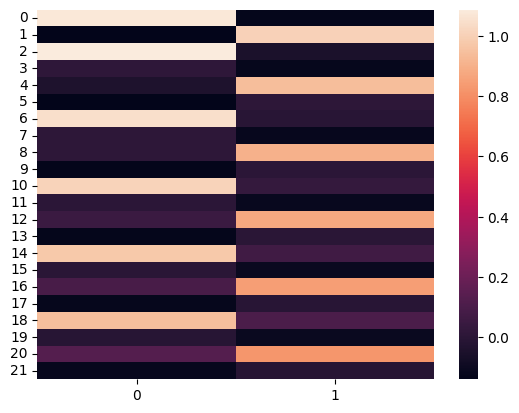

In [ ]:
sns.heatmap(np.concatenate(markov_param_estimates))

We have recovered a system that looks very equivalent!

In [ ]:
A, B, C, D = get_lds_parameters(components[1], m, n, p)

In [ ]:
markov_param_estimates = [D] + [C @ mpow(A, i) @ B for i in range(10)]

<Axes: >

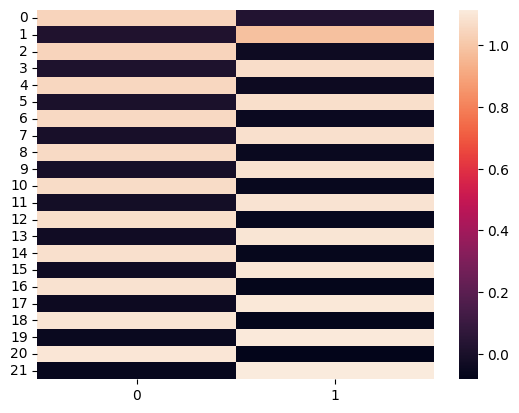

In [ ]:
sns.heatmap(np.concatenate(markov_param_estimates))

Working well here too!